Importar Librerías

In [10]:
import numpy as np
print(np.__version__)
import torch
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
print(torch.__version__)

from dataclasses import dataclass
import time as time

import torchaudio
import librosa

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from IPython.display import clear_output
import IPython.display as ipd
import random
import os

2.1.0
2.6.0+cpu


Definir las diferentes canciones del dataset como instancias de clase para poder acceder a sus atributos fácilmente 

In [ ]:
@dataclass
class Song:
    title: str
    artist: str

songs = [
    # Test
    Song("Guitar Chords", "Test"),
    Song("Guitar Chords 2", "Test"),
    Song("Guitar Chords 3", "Test"),
    Song("Mellow Synth", "Test"),
    Song("Organ Strings", "Test"),
    Song("LoFi Chords", "Test"),
    Song("Guitar Triads", "Test"),
    Song("Jazz Piano", "Test"),
    Song("Misty", "Test"),
    Song("Misty Easy", "Test"),
    Song("Missing Chords", "Test"),
    Song("Blue Bossa Backing Track", "Test"),
    Song("Giant Steps Backing Track", "Test"),
    Song("All of me Backing Track", "Test"),
    Song("Fly me to the moon Backing Track", "Test"),
    Song("Piano Triads", "Test"),
    Song("Isn't She Lovely Backing Track", "Test"),
    Song("All the things you are Backing Track", "Test"),

    # Juan Pablo
    Song("Losing my Religion", "REM"),
    Song("Cemetry Gates", "The Smiths"),
    Song("Enjoy the Silence", "Depeche Mode"),
    Song("Let Me Kiss You", "Morrissey"),
    Song("Half a Person", "The Smiths"),
    Song("Shake the Disease", "Depeche Mode"),
    Song("Man On The Moon", "REM"),
    Song("Go West", "The Pet Shop Boys"),
    Song("Something Special", "Pearl Jam"),

    # Pablo
    Song("Freight Train", "Aaron Watson"),
    Song("Why Don't We Just Dance", "Josh Turner"),
    Song("Pura geografia", "Maria Jaume"),
    Song("Autonomia per principiants", "Maria Jaume"),
    Song("Juna", "Clairo"),
    Song("Roxanne", "The Police"),
    Song("Have You Ever Seen The Rain", "Creedence Clearwater Revival"),
    Song("House Of The Rising Sun", "The Animals"),
    Song("Let It Be", "The Beatles"),
    Song("Take Me Home, Country Roads", "John Denver"),
    Song("Hey Jude", "The Beatles"),
    Song("You're the one that I want", "Grease OST"),

    # Combo
    Song("Love Like You", "Emma Nissen"),
    Song("Love Is a Beautiful Thing", "Vulfpeck"),
    Song("You're Still a Young Man", "Tower of Power"),
    Song("I Feel It Coming", "Scary Pockets"),
    Song("Overjoyed", "Esperanza Spalding"),

    # Pag 1
    Song("Vitara", "Claró"),
    Song("Harness Your Hopes", "Pavement"),
    Song("De Tant en Tant", "La Trinxera"),
    Song("Cariño", "The Marías"),
    Song("No One Noticed", "The Marías"),
    Song("West End Girls", "The Pet Shop Boys"),
    Song("Paranoia", "The Marías"),

    # Pag 2
    Song("Husk", "Black Foxxes"),
    Song("Mrs. Robinson", "The Lemonheads"),
    Song("Boys In The Better Land", "Fontaines D.C."),
    Song("1 de enero", "Yawners"),
    Song("Suena Mejor", "Yawners"),
    Song("Interstate Love Song", "Stone Temple Pilots"),
    Song("Ride", "The Vines"),
    Song("Looking Out For You", "Joy Again"),
    Song("Sparky's Dream", "Teenage Fanclub"),
    Song("Fell in love with a girl", "The White Stripes"),
    Song("Bohemian Like You", "The Dandy Wrahols"),

    # Pag 3
    Song("Mushaboom", "Feist"),
    Song("California Poppy", "Theo Lawrence"),
    Song("Lovesick Blues", "Patsy Cline"),
    Song("Disconnected from Reality", "Alison Darwin"),
    Song("Find Your Freedom", "Alison Darwin"),
    Song("Happy Unhappy", "The Beths"),
    Song("Tek It", "Cafuné"),
    Song("Pla quinquennal", "Manel"),
    Song("Nit freda per ser abril", "Manel"),
    Song("Ai, Dolors", "Manel"),
    Song("Els guapos són els raros", "Manel"),
    Song("I jo pensant en quan vindràs", "Pau Vallvé"),
    Song("Kate", "Ben Folds Five"),
    Song("L'Empordà", "Sopa de Cabra"),
    Song("La Flama", "Obrint Pas"),

    # Jazz
    Song("EL ÚNICO", "CA7RIEL & Paco Amoroso"),
    Song("DUMBAI", "CA7RIEL & Paco Amoroso"),
    Song("Dans mon Paris", "Zaz"),
    Song("Blue Bossa", "Dexter Gordon"),
    Song("Giant Steps", "John Coltrane"),
    Song("Isn't She Lovely", "Stevie Wonder"),
    Song("1612", "Vulfpeck"),
    Song("Back Pocket", "Vulfpeck"),

    # Rock esp
    Song("Lágrimas desordenadas", "Melendi"),
    Song("Por la boca vive el pez", "Fito y Fitipaldis"),
    Song("Barbie de extrarradio", "Melendi"),
    Song("Cuerpo triste", "Estopa"),
    Song("Tenía Tanto Que Darte", "Nena Daconte"),
    Song("King George", "Dover"),
    Song("Carolina", "M-Clan"),
    Song("Antes de que cuente diez", "Fito y Fitipaldis"),
    Song("La Flaca", "Jarabe de Palo"),
    Song("Devuélveme a mi chica", "Hombres G")
]


Función para extraer la info del archivo txt con las marcas temporales y las etiquetas de acordes de una canción.

In [12]:
def segmentate(filename):

    file = open(filename, "r")

    start_times = []
    end_times = []
    chords = []

    # Open the file and process each line  
    # file = open("Etiquetas.txt", "r")
    for line in file:
        parts = line.strip().split("\t")  # Split by tab character
        start_times.append(float(parts[0]))  # Convert to float
        end_times.append(float(parts[1]))    # Convert to float
        chords.append(parts[2])              # Chord name as string

    return start_times, end_times, chords

start_times, end_times, chords = segmentate("Tags/You're Still a Young Man.txt")

print(f'const startTimes = {start_times};')
print(f'const chords = {chords};')

const startTimes = [0.548051, 2.05287, 5.108308, 8.046262, 11.155924, 14.017661, 17.142595, 20.123644, 23.211815, 26.195568, 29.257446, 30.185768, 32.449065, 35.524926, 38.164509, 38.706513, 41.833782, 43.397041, 44.97314, 48.116093, 50.833558, 51.354645, 54.500065, 56.090768, 57.725657, 60.982665, 62.603653, 63.200167, 63.656758, 64.216449, 65.833059, 67.483896, 70.655008, 73.801225, 76.934068, 80.04183, 83.171863, 86.324579, 87.90371, 89.394873, 92.567939, 95.255932, 95.813783, 98.996668, 100.612954, 102.223048, 105.454787, 108.188585, 108.752117, 111.98084, 113.647206, 115.282327, 118.65537, 121.360435, 121.949585, 125.219363, 128.343799, 131.568679, 134.714555, 137.800815, 140.962365, 144.083471, 145.572785, 147.082929, 148.668083, 150.125853, 151.711007, 153.250136, 154.767039, 156.345328, 157.825389, 159.393027, 160.926148, 162.458755, 163.968557, 165.479568, 167.012689, 168.545296, 170.055098, 171.56611, 173.09923, 174.631838, 176.14164, 178.475215, 181.881183, 184.536687, 185.0

Definir el diccionario con las diferentes etiquetas de acordes.

Luego, para cada canción en la carpeta de audios, usando la función segmentate(), separar los diferentes segmentos de audio en acordes individuales. A cada uno de estos fragmentos de audio se les aplica una STFT y de ella se extrae el cromagrama ...que es lo que se acaba añadiendo al dataset (x_train), junto con la etiqueta de acorde correspondiente (y_train).

A parte de la carpeta con las canciones, hay otra con acordes de guitarra ...sin ruido ni otros instrumentos "entorpeciendo" la distinción del acorde. Un bucle itera sobre todos los audios de esta carpeta y aplica el mismo procedimiento.

Finalmente, con toda la info en un mismo torch-dataset, se separa un 20% de ella (de forma alearotia) para la parte de validación cuando se esté entrenando el modelo.

In [13]:
from sklearn.model_selection import train_test_split

chord_mapping = {
    "A":     0,   "Am":     1,  "A5":      2,  "Amaj7":   3,  "Adim":    4,  "A7":      5,  "Am7":    6,  "Aaug":     7,  "A6":    8,  "A9":    9,  "Am6": 10,
    "A#":   11,   "A#m":   12,  "A#5":    13,  "A#maj7": 14,  "A#dim":  15,  "A#7":    16,  "A#m7":  17,  "A#aug":   18,  "A#6":  19,  "A#9":  20,  "A#m6": 21,
    "B":    22,   "Bm":    23,  "B5":     24,  "Bmaj7":  25,  "Bdim":   26,  "B7":     27,  "Bm7":   28,  "Baug":    29,  "B6":   30,  "B9":   31,  "Bm6": 32,
    "C":    33,   "Cm":    34,  "C5":     35,  "Cmaj7":  36,  "Cdim":   37,  "C7":     38,  "Cm7":   39,  "Caug":    40,  "C6":   41,  "C9":   42,  "Cm6": 43,
    "C#":   44,   "C#m":   45,  "C#5":    46,  "C#maj7": 47,  "C#dim":  48,  "C#7":    49,  "C#m7":  50,  "C#aug":   51,  "C#6":  52,  "C#9":  53,  "C#m6": 54,
    "D":    55,   "Dm":    56,  "D5":     57,  "Dmaj7":  58,  "Ddim":   59,  "D7":     60,  "Dm7":   61,  "Daug":    62,  "D6":   63,  "D9":   64,  "Dm6": 65,
    "D#":   66,   "D#m":   67,  "D#5":    68,  "D#maj7": 69,  "D#dim":  70,  "D#7":    71,  "D#m7":  72,  "D#aug":   73,  "D#6":  74,  "D#9":  75,  "D#m6": 76,
    "E":    77,   "Em":    78,  "E5":     79,  "Emaj7":  80,  "Edim":   81,  "E7":     82,  "Em7":   83,  "Eaug":    84,  "E6":   85,  "E9":   86,  "Em6": 87,
    "F":    88,   "Fm":    89,  "F5":     90,  "Fmaj7":  91,  "Fdim":   92,  "F7":     93,  "Fm7":   94,  "Faug":    95,  "F6":   96,  "F9":   97,  "Fm6": 98,
    "F#":   99,   "F#m":  100,  "F#5":   101,  "F#maj7":102,  "F#dim": 103,  "F#7":   104,  "F#m7": 105,  "F#aug":  106,  "F#6": 107,  "F#9": 108,  "F#m6": 109,
    "G":   110,   "Gm":   111,  "G5":    112,  "Gmaj7": 113,  "Gdim":  114,  "G7":    115,  "Gm7":  116,  "Gaug":   117,  "G6":  118,  "G9":  119,  "Gm6": 120,
    "G#":  121,   "G#m":  122,  "G#5":   123,  "G#maj7":124,  "G#dim":125,  "G#7":   126,  "G#m7":127,  "G#aug":  128,  "G#6":129,  "G#9":130,  "G#m6":131,
    "NC":  132,
    "Asus2":133, "A#sus2":134, "Bsus2":135, "Csus2":136, "C#sus2":137, "Dsus2":138, "D#sus2":139, "Esus2":140, "Fsus2":141, "F#sus2":142, "Gsus2":143, "G#sus2":144,
    "Am7b5":145, "A#m7b5":146, "Bm7b5":147, "Cm7b5":148, "C#m7b5":149, "Dm7b5":150, "D#m7b5":151, "Em7b5":152, "Fm7b5":153, "F#m7b5":154, "Gm7b5":155, "G#m7b5":156,
    "Asus4":157, "A#sus4":158, "Bsus4":159, "Csus4":160, "C#sus4":161, "Dsus4":162, "D#sus4":163, "Esus4":164, "Fsus4":165, "F#sus4":166, "Gsus4":167, "G#sus4":168,
    "Am9":169,   "A#m9":170,   "Bm9":171,   "Cm9":172,   "C#m9":173,   "Dm9":174,   "D#m9":175,   "Em9":176,   "Fm9":177,   "F#m9":178,   "Gm9":179,   "G#m9":180 
}

# Create empty lists for training data
X_train, y_train = [], []

# Pad zeros for different fragments
max_length = 5 # Seconds

total_songs = 0
for song in songs:
    total_songs += 1

counter = 0

start_time = time.time() 

for song in songs:

    # Load the full audio file
    audio_path = "Audios/" + song.title + ".mp3"

    y, sr = librosa.load(audio_path, sr=None)  # Load with original sampling rate

    # Normalize
    y = y/np.max(y)

    # Read tag file and extract tagged segments
    start_times, end_times, chords = segmentate('Tags/' + song.title + ".txt")

    dataset = [[round(start, 1), round(end, 1), chord] for start, end, chord in zip(start_times, end_times, chords)]

    # Add padding, extract spectrum and append to dataset
    for start_time, end_time, chord in dataset:

        audio_fragment = y[int(start_time*sr):int(end_time*sr)]
        
        if len(audio_fragment) > max_length * sr:
            audio_fragment = audio_fragment[:int(max_length*sr)]

        elif len(audio_fragment) < max_length * sr:
            audio_fragment = np.pad(audio_fragment, (0, int(max_length * sr) - len(audio_fragment)))

        chromagram = librosa.feature.chroma_stft(y=audio_fragment, sr=sr)
        chromagram = (chromagram - np.mean(chromagram)) / np.std(chromagram)

        # C = librosa.vqt(y, sr=sr, hop_length=512, n_bins=84, bins_per_octave=12, gamma=0)
        # C = librosa.amplitude_to_db(abs(C))

        torch_chroma = torch.tensor(np.array(chromagram), dtype=torch.float32)
        # torch_chroma = torch.tensor(np.array(C), dtype=torch.float32)

        if chord.endswith('min7'):
            chord = chord.replace('min7', 'm7')

        if chord.endswith('m add6'):
            chord = chord.replace('m add6', 'm6')

        if chord.endswith('add6'):
            chord = chord.replace('add6', '6')

        if chord.endswith('add9'):
            chord = chord.replace('add9', '9')

        # Store data
        X_train.append(torch_chroma.unsqueeze(0))
        y_train.append(chord_mapping[chord])
    
    # current_time = time.time()
    clear_output(wait=True)
    print(f'Current Song processed [{counter+1}/{total_songs}]: {song.title}')
    # print(f'Expected Time: {((current_time - start_time) * (total_songs/(counter+1))) / 60 :.2f} minutes')
    counter += 1

dataset_dir = "Guitar/"

total_chords = 0
for filename in os.listdir(dataset_dir):
    total_chords += 1

counter = 0

# Loop through all WAV files
for filename in os.listdir(dataset_dir):
    if filename.endswith(".wav"):
        filepath = os.path.join(dataset_dir, filename)

        # Extract label from filename
        base_name = os.path.splitext(filename)[0]  # Remove ".wav"
        label = base_name.rsplit("_", 1)[0]        # Remove timestamp

        # Load audio
        y, sr = librosa.load(filepath, sr=None)

        chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
        chromagram = (chromagram - np.mean(chromagram)) / np.std(chromagram)
        torch_chroma = torch.tensor(np.array(chromagram), dtype=torch.float32)

        # C = librosa.vqt(y, sr=sr, hop_length=512, n_bins=84, bins_per_octave=12, gamma=0)
        # C = librosa.amplitude_to_db(abs(C))
        # torch_chroma = torch.tensor(np.array(C), dtype=torch.float32)

        X_train.append(torch_chroma.unsqueeze(0))
        y_train.append(chord_mapping[label])

    clear_output(wait=True)
    print(f'Processing Chords [{counter+1}/{total_chords}]')
    counter += 1

# Convert lists to tensors
X_train = torch.stack(X_train)  # Shape: (num_samples, 1, freq, time)
y_train = torch.tensor(y_train, dtype=torch.long)

total_samples = y_train.shape[0]

# Print shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

# Split the dataset (e.g., 80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, shuffle=True
)

print(f"Train set: X={X_train.shape}, y={y_train.shape}")
print(f"Validation set: X={X_val.shape}, y={y_val.shape}")


Processing Chords [784/784]


X_train shape: torch.Size([11480, 1, 12, 431]), y_train shape: torch.Size([11480])
Train set: X=torch.Size([9184, 1, 12, 431]), y=torch.Size([9184])
Validation set: X=torch.Size([2296, 1, 12, 431]), y=torch.Size([2296])


Función para comprobar -de las 181 etiquetas que tiene el mapa de acordes- cuáles no son presentes en el set de validación.

Ahora que ha crecido el número de muestras en el dataset, no acostumbra a devolver más de un par de etiquetas (buena señal en comparación con cuando el dataset era de menor tamaño).

In [14]:
def missing_chords(y_train):
        # Get the unique labels from y_train
        unique_labels_in_y_train = np.unique(y_train)

        # Get all the possible labels from chord_mapping
        all_labels_in_mapping = np.arange(len(chord_mapping))  # Assuming chord_mapping is indexed from 0 to len-1

        # Find the labels in the chord_mapping but missing in y_train
        missing_labels = np.setdiff1d(all_labels_in_mapping, unique_labels_in_y_train)

        # Convert missing label indices to their respective chord names using the inverted mapping
        inv_chord_mapping = {v: k for k, v in chord_mapping.items()}
        missing_chord_names = [inv_chord_mapping[label] for label in missing_labels]

        return missing_labels, missing_chord_names

missing_labels, missing_chord_names = missing_chords(y_train)
print(len(missing_chord_names))
print(f"Missing labels: {missing_chord_names}")

0
Missing labels: []


Visualizar la presencia/cantidad de cada uno de los acordes en el dataset.

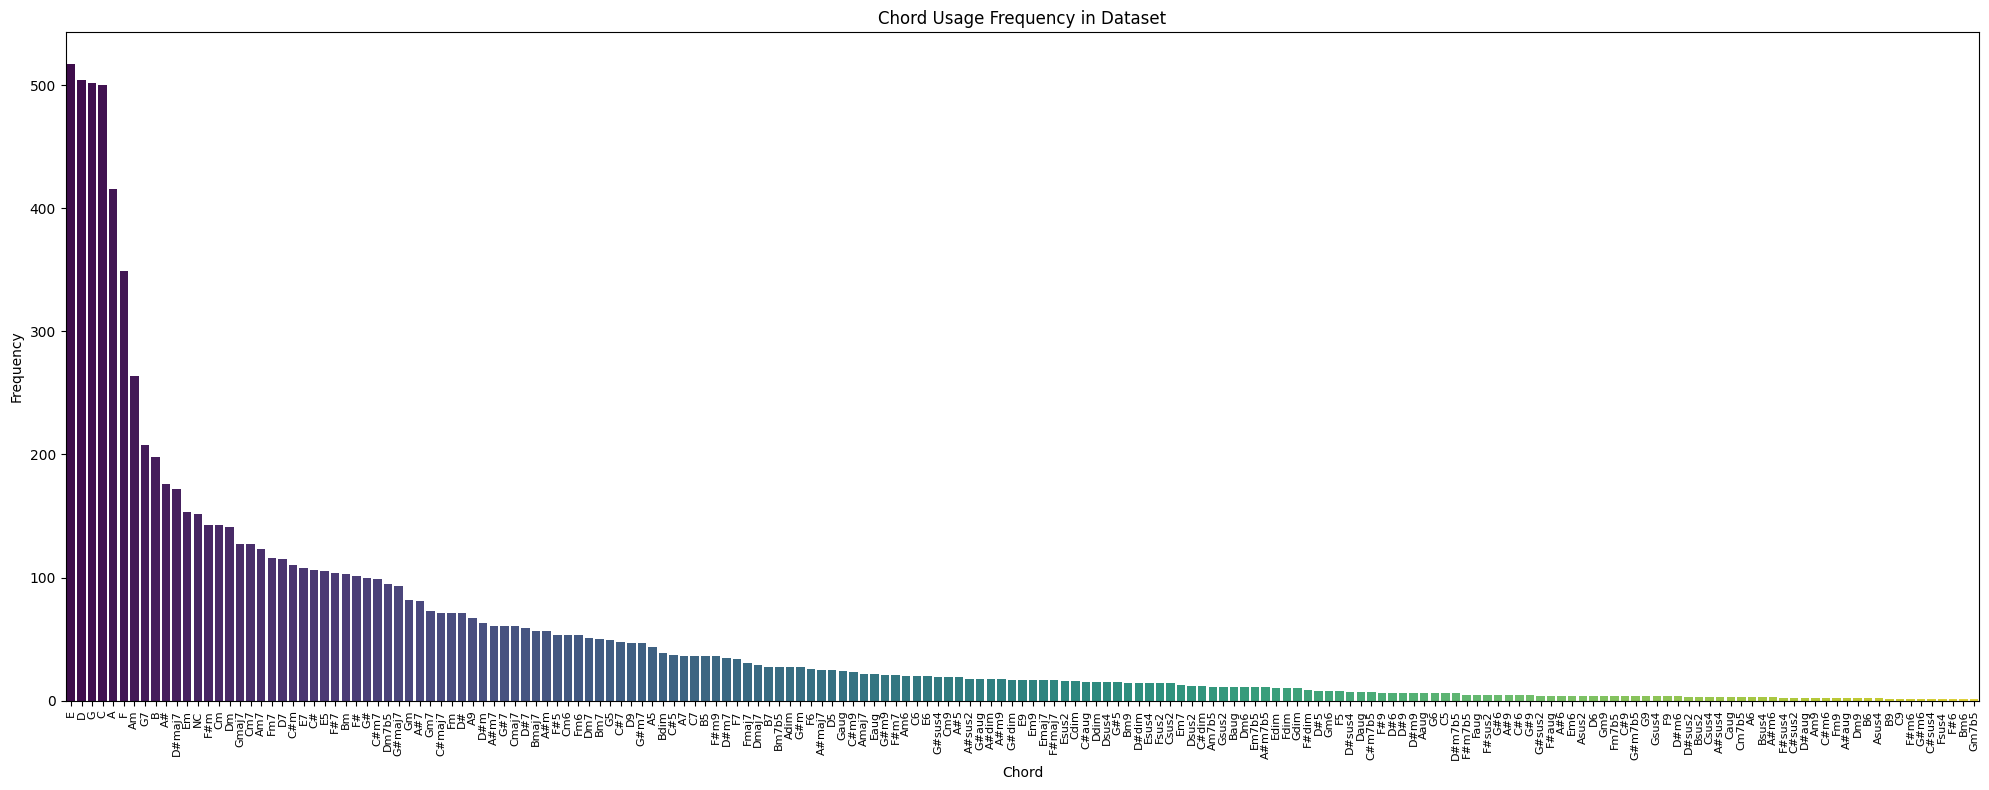

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

# Count the labels
label_counts = Counter(y_train.tolist())

# Invert chord_mapping to get names back
inv_chord_mapping = {v: k for k, v in chord_mapping.items()}

# Map label index back to chord name for plotting
chord_names = [inv_chord_mapping[label] for label in label_counts.keys()]
chord_frequencies = list(label_counts.values())

all_chord_names = chord_names + missing_chord_names
all_chord_frequencies = chord_frequencies + [0] * len(missing_chord_names)

# Sort by frequency (optional for nicer plotting)
sorted_indices = np.argsort(all_chord_frequencies)[::-1]
all_chord_names = [all_chord_names[i] for i in sorted_indices]
all_chord_frequencies = [all_chord_frequencies[i] for i in sorted_indices]

# Plot
plt.figure(figsize=(20, 8))

sns.barplot(x=all_chord_names, y=all_chord_frequencies, palette='viridis')
clear_output(wait=True)
plt.xlabel('Chord')
plt.ylabel('Frequency')
plt.title('Chord Usage Frequency in Dataset')  
# plt.xticks(rotation=90)
plt.xticks(rotation=90, fontsize=8)  # angled and right-aligned
plt.tight_layout()

plt.show()

Definir pesos para cada uno de los acordes y compensar el desbalance entre acordes en el dataset.

(no termina de dar mejores resultados, importante averiguar por qué)

In [ ]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Total number of chord classes
# num_classes = len(chord_mapping)

# # Count occurrences of each class in y_train
# label_counts = Counter(y_train.cpu().numpy())

# # Compute weights (inverse frequency), with smoothing for missing classes
# weights = []

# total_samples = len(y_train)
# for class_idx in range(num_classes):
#     count = label_counts.get(class_idx, 0)
#     if count == 0:
#         # Assign a weight of 0 for missing classes to avoid division by zero
#         weights.append(0.0)
#     else:
#         weights.append(total_samples / count)

# # Convert to tensor
# weights = torch.tensor(weights, dtype=torch.float32)

# # Optional: normalize weights to sum to 1
# # weights = weights / weights.sum()

# # Move to device
# weights = weights.to(device)

# print(weights)


Definir la CNN (le terminé añadiendo una capa densa al final para facilitar el trabajo del modelo de decidir la etiqueta final)

In [68]:
# class ChordClassifier(nn.Module):
#     def __init__(self, num_classes, dropout_rate=0.2): # Antes 30%
#         super(ChordClassifier, self).__init__()

#         self.layer1 = nn.Sequential(
#             nn.Conv2d(1, 16, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Dropout2d(dropout_rate),  # Dropout after activation
#             nn.Conv2d(16, 16, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Dropout2d(dropout_rate),
#             nn.MaxPool2d(kernel_size=(2, 2))
#         )

#         self.layer2 = nn.Sequential(
#             nn.Conv2d(16, 32, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Dropout2d(dropout_rate),
#             nn.Conv2d(32, 32, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Dropout2d(dropout_rate),
#             nn.MaxPool2d(kernel_size=(2, 2))
#         )

#         self.layer3 = nn.Sequential(
#             nn.Conv2d(32, 64, kernel_size=(3, 3)),
#             nn.ReLU(),
#             # Optional dropout here too
#             # nn.Conv2d(64, num_classes, kernel_size=1),

#             nn.AdaptiveAvgPool2d((1, 1))
#         )

#         self.fc = nn.Linear(64, num_classes)

#     def forward(self, x):
#         x = self.layer1(x)
#         x = self.layer2(x)
#         x = self.layer3(x)
#         x = x.view(x.size(0), -1)
#         x = self.fc(x)
#         return F.log_softmax(x, dim=1)

# # Example usage:
# num_classes = len(chord_mapping)  
# model = ChordClassifier(num_classes)

# x_sample = torch.randn(12, 1, 12, 431)
# out = model(x_sample)
# print(out.shape)  # [12, num_classes]

Una CNN con capas más "largas" ...terminaba dando un 2% más de precisión en el set de validación, pero la parte del entrenamiendo era mucho más costosa computacionalmente.

Edit 4 de mayo: Con 11157 muestras, esta arquitectura da un 66% de precisión en comparación al 59% de la arquitectura que estava usando hasta ahora.

In [16]:
import torch.nn as nn
import torch.nn.functional as F

class ChordClassifierImproved(nn.Module):
    def __init__(self, num_classes, dropout_rate=0.3):
        super(ChordClassifierImproved, self).__init__()

        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),

            # Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),

            # Block 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))  # Output: [batch, 128, 1, 1]
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(dropout_rate),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return F.log_softmax(x, dim=1)

# Example usage:
num_classes = len(chord_mapping)  
model = ChordClassifierImproved(num_classes)

x_sample = torch.randn(12, 1, 12, 431)
out = model(x_sample)
print(out.shape)  # [12, num_classes]

torch.Size([12, 181])


Entrenamiento del modelo.

Hasta recientemente que utilizaba un early stopping, pero lo quité al ver que no dejaba converger al modelo correctamente ahora que el dataset había crecido significativamente ...y acababa dando mejores resultados en la precisión de validación (tipo un 3-4% más).

También hay incorporado un label smoothing, que "suaviza" los outputs e incrementa la robustez de la toma de decisiones del modelo.

Una vez finalizado el porceso de entrenamiento, se guardan los parámetros del modelo en un archivo pth y así poderlo cargar posteriormente.

Epoch [100/100], Expected Time: 105.99 minutes


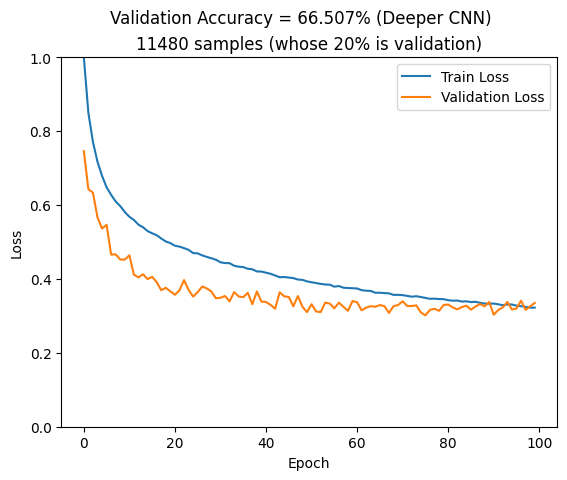

In [17]:
import torch
import torch.optim as optim
import torch.nn as nn
import time
import os 
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

label_mapping = {v: k for k, v in chord_mapping.items()}

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create DataLoader for training dataset (assuming X_train, y_train are tensors)
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# print(val_loader.shape)

# Create model
# model = ChordClassifier(num_classes=len(chord_mapping)).to(device)
model = ChordClassifierImproved(num_classes=len(chord_mapping)).to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)  # Normalized weights / Label smoothing 
# criterion = nn.CrossEntropyLoss()

# Define loss and optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Early stopping parameters
patience = 5
min_delta = 0.01
best_train_loss = float('inf')
epochs_without_improvement = 0

# Training loop
num_epochs = 100
train_losses = []
val_list = []
results = []

start_time = time.time()

for epoch in range(num_epochs):

    total_loss = 0.0
    model.train()

    # Training phase
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(inputs)  # Forward pass
        # print(outputs)
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        total_loss += loss.item()

    # Calculate average training loss for the epoch
    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation phase
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            predicted = torch.argmax(outputs, dim=1)

            for prediction, label in zip(predicted, labels):

                if prediction == label:
                    correct += 1

                results.append((label_mapping[prediction.item()], label_mapping[label.item()]))

            total += labels.size(0)

    val_accuracy = correct / total
    val_list.append(1 - val_accuracy)  

    clear_output(wait=True)

    # if len(val_list) > 15:
    #     # Early stopping check based on training loss

    #     average_accuracy = 1 - np.mean(val_list[-15:])

    #     print(f'Val acc: {(val_accuracy):.3f} Avg val: {(average_accuracy):.3f}')
    #     print(f'Epochs without impromevent: {epochs_without_improvement}')

    #     if val_accuracy > average_accuracy:
    #         epochs_without_improvement = 0

    #         # Save best model
    #         torch.save(model.state_dict(), 'best_model.pth')
    #     else:
    #         epochs_without_improvement += 1

    #     if epochs_without_improvement >= patience:
    #         print(f"Early stopping at epoch {epoch+1}")
    #         break

    # Plot progress

    # if len(val_list) > 10:
    #     print(f'Average plateau accuracy: {((1 - np.mean(val_list[-10:]))* 100):.3f}%')

    current_time = time.time()
    print(f"Epoch [{epoch+1}/{num_epochs}], Expected Time: {((current_time - start_time) * (num_epochs/(epoch+1))) / 60 :.2f} minutes")

    plt.plot(np.array(train_losses) / np.max(train_losses), label='Train Loss')
    plt.plot(np.array(val_list), label='Validation Loss')
    
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0,1)
    plt.title(f'{total_samples} samples (whose 20% is validation)')
    plt.suptitle(f'Validation Accuracy = {(val_accuracy * 100):.3f}% (Deeper CNN)')
    plt.legend()
    plt.show()

torch.save(model.state_dict(), 'best_model.pth')


Visualizar los aciertos y errores más comunes del modelo durante el entrenamiento.

In [153]:
chord_results = []

for label in label_mapping:

    correct = 0
    total = 0

    chord = inv_chord_mapping[label]

    for pred, true in results:
        if pred == chord and true == chord:
            correct += 1

        if true == chord:
            total += 1

    if total != 0:
        # print(f'{chord}: {((correct/total)*100):.3f}%')
        chord_results.append((chord, correct/total))


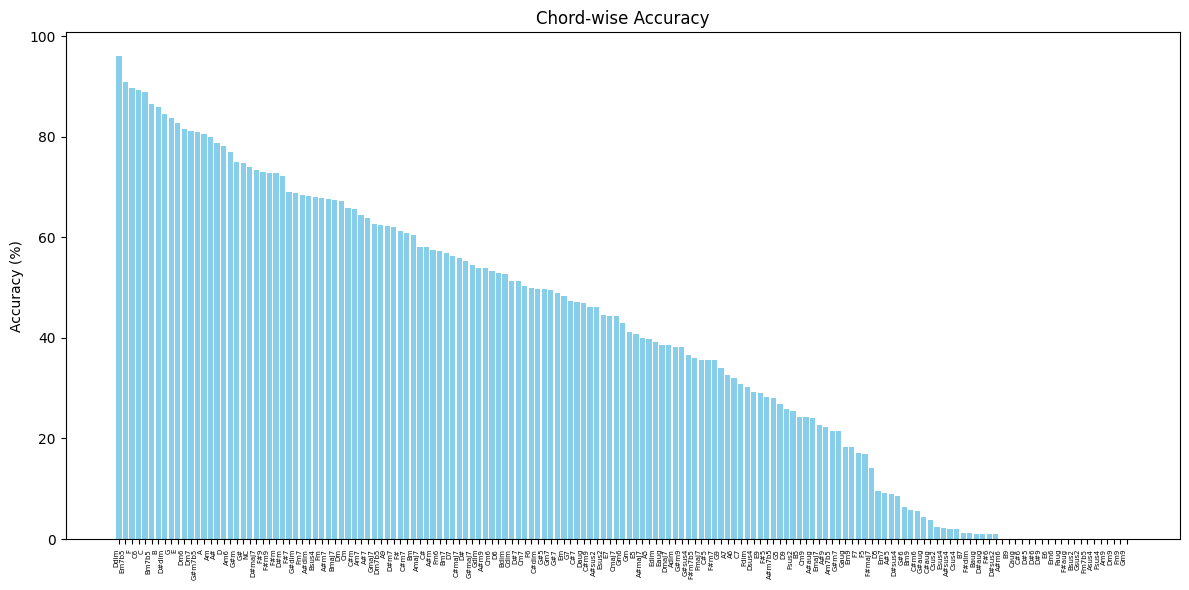

In [152]:
# Sort the results by accuracy (descending order)
sorted_results = sorted(chord_results, key=lambda x: x[1], reverse=True)

# Unpack the chords and accuracies
chords, accuracies = zip(*sorted_results)

# Convert accuracy to percentage for display
percentages = [acc * 100 for acc in accuracies]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(chords, percentages, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy (%)')
plt.title('Chord-wise Accuracy')
plt.xticks(rotation=90, fontsize=5) 
plt.tight_layout()
plt.show()

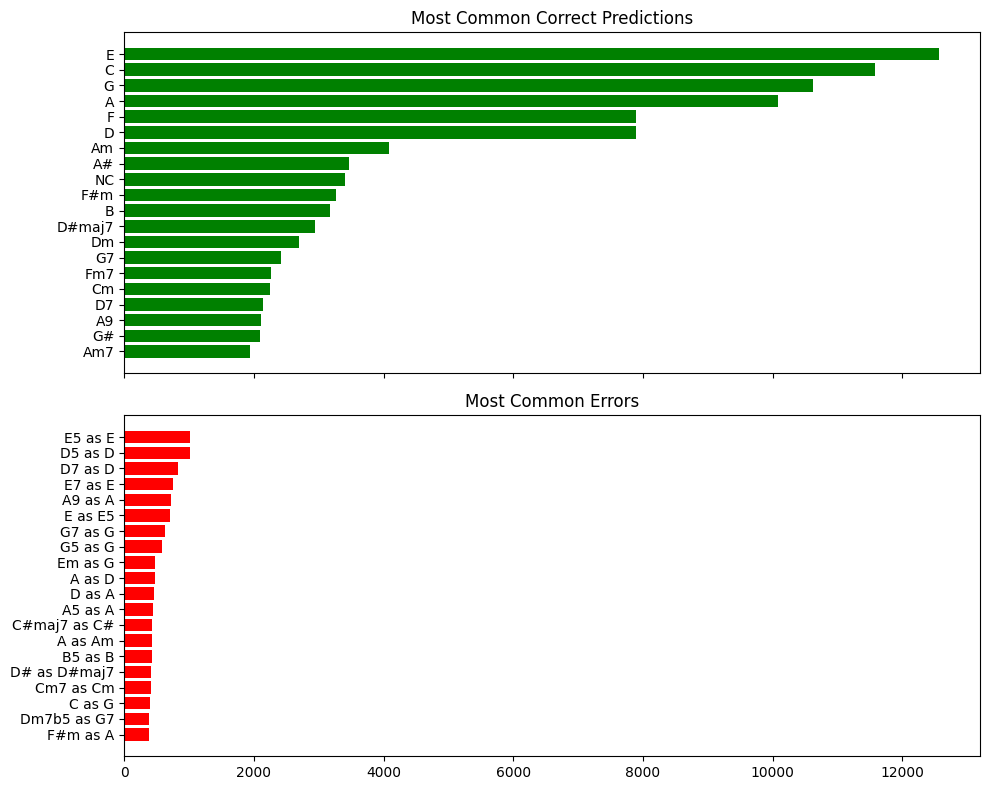

In [133]:
def plot_results(results):
    correct = []
    errors = []

    for pred, true in results:
        if pred == true:
            correct.append(pred)
        else:
            errors.append((pred, true))

    # Count
    correct_counter = Counter(correct)
    error_counter = Counter(errors)

    # Top 10 correct predictions
    correct_common = correct_counter.most_common(20)
    correct_labels, correct_counts = zip(*correct_common)

    # Top 10 errors
    error_common = error_counter.most_common(20)
    error_labels, error_counts = zip(*error_common)
    error_labels = [f"{true} as {pred}" for pred, true in error_labels]

    # Plot
    fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    # Correct matches
    axs[0].barh(correct_labels, correct_counts, color='green')
    axs[0].set_title('Most Common Correct Predictions')
    axs[0].invert_yaxis()

    # Errors
    axs[1].barh(error_labels, error_counts, color='red')
    axs[1].set_title('Most Common Errors')
    axs[1].invert_yaxis()

    plt.tight_layout()
    # plt.axis('equal')
    plt.show()

plot_results(results)

Visualizar la curva de precisión de validación con respecto a la cantidad de muestras del dataset.

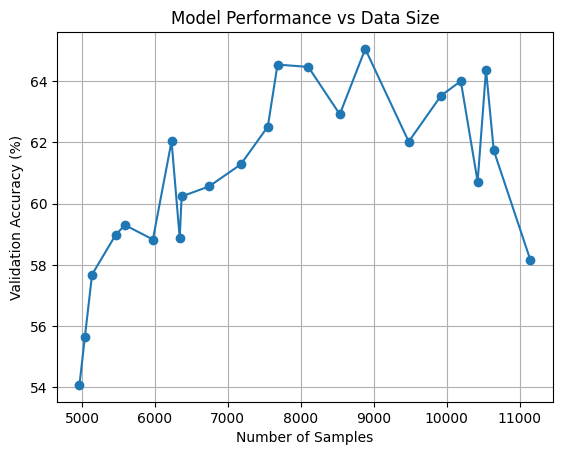

In [38]:
performances = [
    (4965, 54.079),
    (5040, 55.655),
    (5138, 57.685),
    (5460, 58.974),
    (5588, 59.302),
    # (5972, 56.987),
    # (5972, 60.669),
    (5972, 58.828),
    (6228, 62.039),
    # (6340, 59.700),
    # (6340, 58.044),
    (6340, 58.872),
    # (6366, 54.788),
    # (6366, 58.634),
    # (6366, 60.911),
    # (6366, 61.695),
    # (6366, 61.068),
    # (6366, 60.204),
    # (6366, 62.637),
    # (6366, 61.931),
    (6366, 60.2335),
    # (6743, 59.674),
    # (6743, 61.453),
    (6743, 60.5635),
    (7177, 61.281),
    (7548, 62.517),
    (7681, 64.541),
    (8103, 64.466),
    # (8535, 62.976),
    # (8535, 62.859),
    (8535, 62.9175),
    (8884, 65.053),
    (9480, 62.025),
    # (9923, 61.662),
    # (9923, 65.390),
    (9923, 63.526),
    (10194, 64.002),
    (10425, 60.719),
    (10540, 64.374),
    (10646, 61.737),
    (11148, 58.161)
]

samples, accuracies = zip(*performances)
plt.plot(samples, accuracies, marker='o')
plt.xlabel("Number of Samples")
plt.ylabel("Validation Accuracy (%)")
plt.title("Model Performance vs Data Size")
plt.grid(True)
plt.show()


La guinda del pastel, aquí se carga el archivo de los parámetros del modelo y se utiliza para predecir los fragmentos de acordes que le proporciono a través de una targeta de sonido.

El resultado visualiza la predicción en un plot.


Finalmente, hay la opción de guardar estos inputs de audio como archivos para el próximo set de entrenamiento. 

Antes de guardarlo, te pide escribir la etiqueta del acorde que se ha tocado (importante escribir "NC" si no se ha tocado nada en particular) ...muy importante que siga el formato usado en el chord mapping! 

Recording finished.


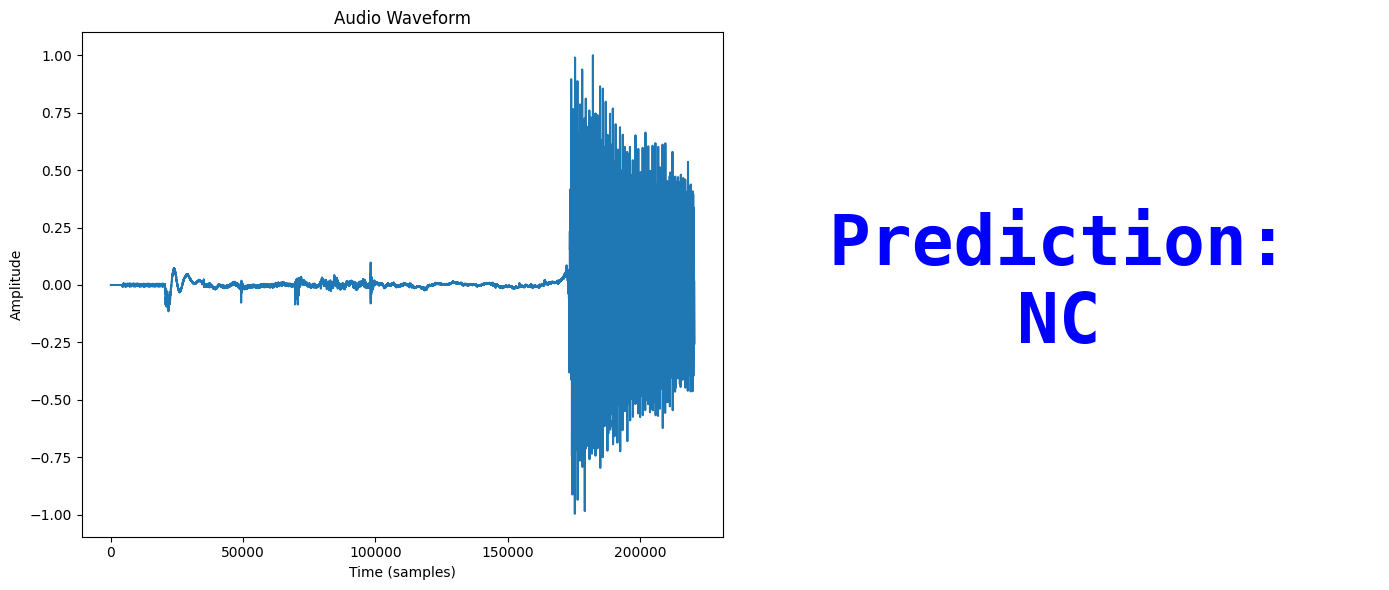

Audio saved to Guitar/Em7_1746398094.wav


In [158]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

# model = ChordClassifier(num_classes=len(chord_mapping))
model = ChordClassifierImproved(num_classes=len(chord_mapping))
model.load_state_dict(torch.load('deepcnn_0405.pth', weights_only=True))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

# Define the sample rate and duration of recording
sample_rate = 44100  # in Hz
duration = 5  # seconds

# Record audio from the microphone (Focusrite sound card)
print("Recording...")
# audio_data = sd.rec(int(sample_rate * duration), samplerate=sample_rate, channels=1, dtype='float32')

device_index = 2  # replace with actual index of your Focusrite

audio_data = sd.rec(int(sample_rate * duration),
                    samplerate=sample_rate,
                    channels=1,
                    dtype='float32',
                    device=device_index)

sd.wait()  # Wait for the recording to finish

clear_output(wait=True)
print("Recording finished.")

audio_data = audio_data.flatten()

audio_data = audio_data/np.max(audio_data)

chromagram = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)
torch_chroma = torch.tensor(np.array(chromagram), dtype=torch.float32)
torch_chroma = torch_chroma.unsqueeze(0).unsqueeze(0)
torch_chroma = torch_chroma.to(device)

with torch.no_grad():
    output = model(torch_chroma)

    # print(output.shape)
    predicted_class = torch.argmax(output, dim=1).item()

label_mapping = {v: k for k, v in chord_mapping.items()}
predicted_label = label_mapping[predicted_class]

# Rseult Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(audio_data)
ax1.set_title('Audio Waveform')
ax1.set_xlabel('Time (samples)')
ax1.set_ylabel('Amplitude')

ax2.text(0.5, 0.5, f'Prediction:\n{predicted_label}',
         fontsize=50, ha='center', va='center',
         color='blue', fontweight='bold', family='monospace')
ax2.axis('off')  # Optional: hide axes in the text plot

plt.tight_layout()  # Adjust spacing
plt.show()

user_label = input("Enter chord label:")

# Save audio 
dataset_dir = 'Guitar/'
# os.makedirs(dataset_dir, exist_ok=True)

filename = f"{user_label}_{int(time.time())}.wav"
filepath = os.path.join(dataset_dir, filename)
sf.write(filepath, audio_data, sample_rate)

print(f"Audio saved to {filepath}")
# ipd.Audio(audio_data, rate=sample_rate)